In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dimension = 1
popsize = 100
generation = 50
xmax, xmin = 9, 0
vmax, vmin = 9, -9
c1, c2 = 1.8, 1.8
w, wmax, wmin = 0.9, 0.9, 0.4

pbest_x = []
pbest_y = []
gbest_x = []
gbest_y = []
best_fit = 0

In [5]:
def initial(popsize, dimension, xmax, xmin):
    """
    初始化种群和初始速度
    """
    pop = [[random.uniform(xmin, xmax) for i in range(dimension)] for j in range(popsize)]
    v = [[0.01 * random.random() for i in range(dimension)] for j in range(popsize)]
    return pop, v

In [6]:
def cal_fit(pop):
    """
    计算种群中每个个体对应的函数值和适应度
    """
    fitness = []
    value = []
    for i in range(len(pop)):
        x = pop[i][0]                                     #由于目标函数是一元函数，无需遍历
        temp = -(x + 10 * math.sin(5 * x) + 7 * math.cos(4 * x)) #要求最小值，适应度应加负号
        value.append(-temp)
        fit = float('inf')
        fit = 1 / (math.pow(math.e, -temp) + 1)            #利用sigmoid函数将适应度映射到[0,1]
        fitness.append(fit)
    return value, fitness

In [7]:
def get_best(pop, value, fitness, pbest_x, pbest_y, gbest_x, gbest_y, best_fit):
    """
    获取最大适应度及其对应的横纵坐标
    """
    temp1= np.array(fitness)
    temp2 = temp1.argsort()
    ix = temp2[-1]
    pbest_x.append(pop[ix])
    pbest_y.append(value[ix])
    if fitness[ix] > best_fit:
        best_fit = fitness[ix]
        gbest_x = pop[ix]
        gbest_y = value[ix]
    return pbest_x, pbest_y, gbest_x, gbest_y, best_fit

In [8]:
def w_update(wmax, wmin, t, generation):
    """
    利用线性下降方法对w进行处理，在初期w较大，适合大范围寻找最优值
    后期w较小，适合小范围寻找最优值
    """
    w = wmax - (wmax - wmin) * t / generation
    return w

In [9]:
def v_update(v, w, c1, c2, pbest_x, gbest_x, vmax, vmin):
    """
    对速度进行更新
    """
    r1 = random.random()
    r2 = random.random()
    for i in range(len(pop)):
        for j in range(len(pop[i])):
            temp1 = w * v[i][j]
            temp2 = c1 * r1 *(pbest_x[-1][j] - pop[i][j])
            temp3 = c2 * r2 *(gbest_x[j] - pop[i][j])
            v[i][j] = temp1 + temp2 + temp3
            if v[i][j] > vmax:
                v[i][j] = vmax
            if v[i][j] < vmin:
                v[i][j] = vmin
    return v

In [10]:
def pop_update(pop, v, xmax, xmin):
    """
    对位置进行更新
    """
    newpop = []         #列表是可变对象，如果在原pop上改动会影响之前的计算结果
    for i in range(len(pop)):
        temp = []
        for j in range(len(pop[i])):
            temp.append(pop[i][j] + v[i][j])
            if temp[j] > xmax:
                temp[j] = xmax
            if temp[j] < xmin:
                temp[j] = xmin
        newpop.append(temp)
    return newpop

In [11]:
pop, v = initial(popsize, dimension, xmax, xmin)
# print(pop)
# print(v)

In [12]:
for t in range(generation):

    value, fitness = cal_fit(pop)
    pbest_x, pbest_y, gbest_x, gbest_y, best_fit = get_best(pop, value, fitness, pbest_x,
                                                            pbest_y, gbest_x, gbest_y, best_fit)
    w = w_update(wmax, wmin, t, generation)
    v = v_update(v, w, c1, c2, pbest_x, gbest_x, vmax, vmin)
    pop = pop_update(pop, v, xmax, xmin)         
    
print(gbest_x, gbest_y)

[0.89172403694657] -15.164402119604219


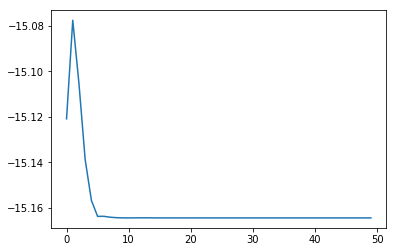

In [13]:
x = list(range(generation))
plt.plot(x, pbest_y)